In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_csv(r"..\1_Data\london_house_price_data.csv")
df_subset = pd.read_csv(r'../1_data/df_lbsm_cleaned.csv')

In [3]:
df_merged = pd.merge(df_original, df_subset, on='postcode', how='left')

# 5. Optional: Fill missing values if some postcodes didn't match the building data
df_merged['construction_age_band'] = df_merged['construction_age_band'].fillna('Unknown')
df_merged['conservation_area_flag'] = df_merged['conservation_area_flag'].fillna('not in conservation area')
df_original = df_merged.copy()

In [4]:
df_original.columns

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange',
       'construction_age_band', 'conservation_area_flag'],
      dtype='object')

In [5]:
df_original['conservation_area_flag'].value_counts()

conservation_area_flag
not in conservation area    278137
in conservation area        140064
Name: count, dtype: int64

In [6]:
pd.set_option('display.max_columns', None)
df_original

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange,construction_age_band,conservation_area_flag
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,NaN,2100.0,2350.0,2600.0,570000.0,600000.0,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN,2012-onwards,in conservation area
1,"Flat 6, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,NaN,NaN,NaN,NaN,Leasehold,Flat/Maisonette,NaN,2100.0,2350.0,2600.0,540000.0,600000.0,660000.0,MEDIUM,2024-10-07T13:26:59.894Z,425000.0,242.857143,2000-05-26,1995-01-02,830000,NaN,NaN,2012-onwards,in conservation area
2,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,England,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,C,2650.0,2950.0,3250.0,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950,NaN,NaN,1996-2011,not in conservation area
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,England,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,D,1850.0,2000.0,2100.0,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000,NaN,NaN,1900-1929,not in conservation area
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,End Terrace House,D,4350.0,4850.0,5350.0,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN,1900-1929,not in conservation area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418196,"9 Harvard Road, London, SE13 6SE",SE13 6SE,England,SE13,51.452919,-0.010221,2.0,3.0,123.0,2.0,Freehold,End Terrace House,D,2450.0,2700.0,2950.0,643000.0,677000.0,711000.0,HIGH,2025-01-10T11:04:57.114Z,27000.0,4.153846,2024-09-27,2024-09-27,650000,17.117117,95000.0,1900-1929,not in conservation area
418197,"Lower Ground Floor Flat 5, Northwood Hall, Hor...",N6 5PE,England,N6,51.571692,-0.137007,1.0,2.0,60.0,1.0,Leasehold,Purpose Built Flat,C,1450.0,1600.0,1750.0,428000.0,450000.0,473000.0,HIGH,2025-01-10T11:04:57.114Z,10000.0,2.272727,2024-09-27,2024-09-27,440000,2.325581,10000.0,1930-1949,in conservation area
418198,"17 Merritt Road, London, SE4 1DU",SE4 1DU,England,SE4,51.456054,-0.035073,2.0,3.0,100.0,1.0,Freehold,Mid Terrace House,D,3100.0,3450.0,3750.0,771000.0,812000.0,853000.0,HIGH,2025-01-10T11:04:57.114Z,38000.0,4.909561,2024-09-27,2024-09-27,774000,128.655835,435500.0,1900-1929,not in conservation area
418199,"15 Chester Row, London, SW1W 9JF",SW1W 9JF,England,SW1W,51.493587,-0.152122,3.0,4.0,218.0,2.0,Freehold,Terrace Property,C,19050.0,20900.0,22800.0,4888000.0,5432000.0,5975000.0,MEDIUM,2025-01-10T11:04:57.114Z,-818000.0,-13.088000,2024-09-27,2024-09-27,6250000,73.611111,2650000.0,pre-1900,in conservation area


In [7]:
df = df_original

df['in_conservation_area'] = (df['conservation_area_flag'] == 'in conservation area').astype(int)
df = df.drop(columns=['conservation_area_flag'])

df['soldPrice'] = df ['history_price']
df['soldDate'] = df ['history_date']
df['soldDate'] = pd.to_datetime(df['soldDate'])
df['soldYear'] = df['soldDate'].dt.year
df['sqmPrice'] = (df['soldPrice']/df['floorAreaSqM']).round(2)
# Bins
bins = [0, 37, 50, 60, 72, 90, 120, 160, 200, 10000]
labels = ['< 37m²', '37-50m²', '50-60m²', '60-72m²', '72-90m²', '90m²-120m²', '120m²-160m²', '160m²-200m²', '> 200m²']
df['size_bucket'] = pd.cut(df['floorAreaSqM'], bins=bins, labels=labels)

df = df[df['soldYear'] >= 2023]
def get_trimester(month):
    if month in [1, 2, 3]:
        return 'T1'
    elif month in [4, 5, 6]:
        return 'T2'
    elif month in [7, 8, 9]:
        return 'T3'
    else:
        return 'T4'

df['soldT'] = df['soldDate'].dt.month.apply(get_trimester)

column_order = ['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating', 'soldYear', 'soldT', 'soldPrice', 'sqmPrice', 'soldDate', 'size_bucket', 'construction_age_band', 'in_conservation_area']
df = df[column_order]

In [8]:
df['in_conservation_area'].value_counts()

in_conservation_area
0    60274
1    21458
Name: count, dtype: int64

In [9]:
# Null values
df_all_is_null = df[df['bedrooms'].isnull() & df['bathrooms'].isnull() & df['livingRooms'].isnull() & df['floorAreaSqM'].isnull()]
df = df.drop(df_all_is_null.index)
df = df.dropna(subset=['propertyType'])
df['tenure'] = df['tenure'].fillna('Unknown')
# df_floorAreaSqM_is_null = df[df['floorAreaSqM'].isnull()]
# df_bathrooms_is_null = df[df['bathrooms'].isnull()]
# df_bathrooms_is_null
# print(df_bathrooms_is_null.describe())

# df_allrooms_is_null = df[df['bedrooms'].isnull() & df['bathrooms'].isnull() & df['livingRooms'].isnull()]
# df_allrooms_is_null

In [10]:
# NULL MANAGEMENT
# FLOOR AREA NULL ---------------------------------------------------------------------------------------------------------------------------------------------

# 1. Create the 'area_code' column (extract letters, e.g., 'SE' from 'SE13')
df['area_code'] = df['outcode'].str.extract(r'^([A-Z]+)')

print(f"Starting Imputation. Initial nulls: {df['floorAreaSqM'].isnull().sum()}")

# STEP 1: Gold Standard (Exact Outcode)
# Matches: Type + Beds + Baths + Living + Exact Neighborhood (e.g., 'SE13')
# Added 'bedrooms' to the list
medians_gold = df.groupby(['propertyType', 'bedrooms', 'bathrooms', 'livingRooms', 'outcode'])['floorAreaSqM'].transform('median')
df['floorAreaSqM'] = df['floorAreaSqM'].fillna(medians_gold)

print(f"Nulls remaining after Step 1 (Exact Outcode): {df['floorAreaSqM'].isnull().sum()}")

# STEP 2: Silver Standard (Broad Area Code)
# Matches: Type + Beds + Baths + Living + Region (e.g., 'SE')

medians_silver = df.groupby(['propertyType', 'bedrooms', 'bathrooms', 'livingRooms', 'area_code'])['floorAreaSqM'].transform('median')
df['floorAreaSqM'] = df['floorAreaSqM'].fillna(medians_silver)

print(f"Nulls remaining after Step 2 (Area Code): {df['floorAreaSqM'].isnull().sum()}")
df = df.dropna(subset=['floorAreaSqM'])

# DROP WRONG COLLECTED DATA ---------------------------------------------------------------------------------------------------------------------------------------------
house_types = ['Detached House', 'Semi-Detached House', 'Mid Terrace House', 
               'End Terrace House', 'Terrace Property', 'Terraced']
df = df[
    (df['propertyType'].isin(['Purpose Built Flat', 'Flat/Maisonette', 'Converted Flat'])) |
    ((df['propertyType'].isin(house_types)) & (df['floorAreaSqM'] >= 120))]
df = df[df['sqmPrice'] < 70000]

# Drop duplicates
print(f"Rows BEFORE dropping duplicates: {len(df)}")
df = df.drop_duplicates(subset=['fullAddress', 'soldPrice', 'soldDate'], keep='first')
# Verify the result
print(f"Rows after dropping duplicates: {len(df)}")

rows_to_drop = (
    # Case 1: Tiny (< 37) with 2+ baths
    ((df['size_bucket'] == '< 37m²') & (df['bathrooms'] >= 2)) | 

    # Case 2: Small (37-50) with 2+ baths OR 2+ beds
    # IMPORTANT: The OR logic for beds/baths must be wrapped in its own brackets ()
    ((df['size_bucket'] == '37-50m²') & ((df['bathrooms'] >= 2) | (df['bedrooms'] >= 2))) | 

    # Case 3: Medium (50-60) with 3+ baths OR 4+ beds
    ((df['size_bucket'] == '50-60m²') & ((df['bathrooms'] >= 3) | (df['bedrooms'] >= 4))) | 

    # Case 4: Standard (60-72) with 4+ baths
    ((df['size_bucket'] == '60-72m²') & (df['bathrooms'] >= 4))
)
print(f"Dropping {rows_to_drop.sum()} rows.")
df = df[~rows_to_drop]


# BATHROOMS NULL---------------------------------------------------------------------------------------------------------------------------------------------

# # Added 1 bathroom to house <60 m2
small_house_mask = (df['bathrooms'].isnull()) & (df['floorAreaSqM'] < 60)
df.loc[small_house_mask, 'bathrooms'] = 1

df['area_code'] = df['outcode'].str.extract(r'^([A-Z]+)')

# Create 'Approximate Size' buckets (Rounding to nearest 5 meters)
df['sqm_approx'] = (df['floorAreaSqM'] / 5).round() * 5

print(f"Starting Imputation. Initial nulls in Bathrooms: {df['bathrooms'].isnull().sum()}")

# STEP 1: Gold Standard (Exact Outcode + Similar Size)
# Matches: Beds + Exact Outcode + Approx Size
print("Applying Step 1: Matching Exact Location & Size...")

medians_gold = df.groupby(['bedrooms', 'outcode', 'sqm_approx'])['bathrooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['bathrooms'] = df['bathrooms'].fillna(medians_gold)

print(f"Nulls remaining after Step 1: {df['bathrooms'].isnull().sum()}")

# STEP 2: Silver Standard (Broad Area Code + Similar Size)

print("Applying Step 2: Matching Broad Region & Size...")

# Note: We use the Broad 'area_code' here instead of specific 'outcode'
medians_silver = df.groupby(['bedrooms', 'area_code', 'sqm_approx'])['bathrooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['bathrooms'] = df['bathrooms'].fillna(medians_silver)

print(f"Nulls remaining after Step 2: {df['bathrooms'].isnull().sum()}")

# BEDROOMS and LIVING ROOMS NULL---------------------------------------------------------------------------------------------------------------------------------------------

# # All appartments smaller than 37 m2 will have 1 bedroom and 0 living rooms
studio_mask = df['floorAreaSqM'] < 38
print(f"Standardizing {studio_mask.sum()} properties < 36m² to be Studios (1 Bed, 0 Living).")
df.loc[studio_mask, 'bedrooms'] = 1
df.loc[studio_mask, 'livingRooms'] = 0

studio_mask2 = (df['floorAreaSqM'] > 38) & (df['floorAreaSqM'] < 57)
df.loc[studio_mask2, 'bedrooms'] = 1
df.loc[studio_mask2, 'livingRooms'] = 1

print(f"Starting Imputation. Initial nulls in Bathrooms: {df['bathrooms'].isnull().sum()}")

# STEP 1: Gold Standard (Exact Outcode + Similar Size)
# Matches: Beds + Living + Exact Outcode + Approx Size
print("Applying Step 1: Matching Exact Location & Size...")

medians_gold = df.groupby(['bathrooms', 'outcode', 'sqm_approx'])['bedrooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['bedrooms'] = df['bedrooms'].fillna(medians_gold)

print(f"Nulls remaining after Step 1: {df['bedrooms'].isnull().sum()}")

# STEP 2: Silver Standard (Broad Area Code + Similar Size)

print("Applying Step 2: Matching Broad Region & Size...")

# Note: We use the Broad 'area_code' here instead of specific 'outcode'
medians_silver = df.groupby(['bathrooms', 'area_code', 'sqm_approx'])['bedrooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['bedrooms'] = df['bedrooms'].fillna(medians_silver)

# STEP 1: Gold Standard (Exact Outcode + Similar Size)
# Matches: Beds + Living + Exact Outcode + Approx Size
print("Applying Step 1: Matching Exact Location & Size...")

medians_gold = df.groupby(['bedrooms', 'bathrooms', 'outcode', 'sqm_approx'])['livingRooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['livingRooms'] = df['livingRooms'].fillna(medians_gold)

print(f"Nulls remaining after Step 1: {df['livingRooms'].isnull().sum()}")

# STEP 2: Silver Standard (Broad Area Code + Similar Size)

print("Applying Step 2: Matching Broad Region & Size...")

# Note: We use the Broad 'area_code' here instead of specific 'outcode'
medians_silver = df.groupby(['bedrooms', 'bathrooms', 'area_code', 'sqm_approx'])['livingRooms'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

df['livingRooms'] = df['livingRooms'].fillna(medians_silver)
print(f"Nulls remaining after Step 1: {df['livingRooms'].isnull().sum()}")


# Energy Rates---------------------------------------------------------------------------------------------------------------------------------------------
df['currentEnergyRating'] = df['currentEnergyRating'].fillna('NotRated')

# Rest of nulls---------------------------------------------------------------------------------------------------------------------------------------------
df = df.dropna()

Starting Imputation. Initial nulls: 4887
Nulls remaining after Step 1 (Exact Outcode): 1810
Nulls remaining after Step 2 (Area Code): 1399
Rows BEFORE dropping duplicates: 59484
Rows after dropping duplicates: 40727
Dropping 363 rows.
Starting Imputation. Initial nulls in Bathrooms: 5373
Applying Step 1: Matching Exact Location & Size...
Nulls remaining after Step 1: 3134
Applying Step 2: Matching Broad Region & Size...
Nulls remaining after Step 2: 2750
Standardizing 965 properties < 36m² to be Studios (1 Bed, 0 Living).
Starting Imputation. Initial nulls in Bathrooms: 2750
Applying Step 1: Matching Exact Location & Size...
Nulls remaining after Step 1: 2705
Applying Step 2: Matching Broad Region & Size...
Applying Step 1: Matching Exact Location & Size...
Nulls remaining after Step 1: 3003
Applying Step 2: Matching Broad Region & Size...
Nulls remaining after Step 1: 2755


In [11]:
print(df['size_bucket'].unique())

['37-50m²', '90m²-120m²', '< 37m²', '60-72m²', '50-60m²', '72-90m²', '120m²-160m²', '160m²-200m²', '> 200m²']
Categories (9, object): ['< 37m²' < '37-50m²' < '50-60m²' < '60-72m²' ... '90m²-120m²' < '120m²-160m²' < '160m²-200m²' < '> 200m²']


In [12]:
print(df['bathrooms'].dtype)

float64


In [13]:
df_incoerence1 = df[(df['size_bucket'] == '37-50m²')]
df_incoerence1.sort_values(by='bedrooms', ascending=False)

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,soldYear,soldT,soldPrice,sqmPrice,soldDate,size_bucket,construction_age_band,in_conservation_area,area_code,sqm_approx
336472,"30 Britton Close, London, SE6 1AP",SE6 1AP,England,SE6,51.445308,-0.008436,1.0,1.0,50.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,208700,4174.00,2023-01-03,37-50m²,1983-1995,0,SE,50.0
336479,"5 Staniforth Court, Tierney Lane, London, W6 9YH",W6 9YH,England,W6,51.486989,-0.225021,1.0,1.0,44.0,1.0,Leasehold,Purpose Built Flat,B,2023,T1,244601,5559.11,2023-01-03,37-50m²,2012-onwards,1,W,45.0
336485,"23 Cambridge House, 23 Courtfield Gardens, Lon...",W13 0HP,England,W13,51.516849,-0.324441,1.0,1.0,50.0,1.0,Unknown,Flat/Maisonette,C,2023,T1,312500,6250.00,2023-01-03,37-50m²,1967-1982,0,W,50.0
336516,"Flat 3, Block B Peabody Estate, Rosendale Road...",SE24 9DZ,England,SE24,51.447466,-0.101052,1.0,1.0,38.0,1.0,Leasehold,Flat/Maisonette,C,2023,T1,314000,8263.16,2023-01-04,37-50m²,1930-1949,1,SE,40.0
336518,"Flat 3, 5 Sinclair Gardens, London, W14 0AU",W14 0AU,England,W14,51.502309,-0.217127,1.0,1.0,38.0,1.0,Leasehold,Converted Flat,C,2023,T1,375000,9868.42,2023-01-04,37-50m²,1930-1949,1,W,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418063,"Flat 14, 11 Canalside Square, London, N1 7FN",N1 7FN,England,N1,51.534101,-0.094867,1.0,1.0,47.0,1.0,Leasehold,Flat/Maisonette,B,2024,T3,525000,11170.21,2024-09-13,37-50m²,2012-onwards,0,N,45.0
418069,"Flat 93, Eyot House, Sun Passage, London, SE16...",SE16 4BP,England,SE16,51.496933,-0.068789,1.0,1.0,47.0,1.0,Leasehold,Purpose Built Flat,B,2024,T3,402500,8563.83,2024-09-13,37-50m²,1996-2011,0,SE,45.0
418079,"Flat 2, 615 High Road Leytonstone, London, E11...",E11 4PA,England,E11,51.562138,0.008742,1.0,1.0,46.0,1.0,Leasehold,Purpose Built Flat,C,2024,T3,120000,2608.70,2024-09-13,37-50m²,1996-2011,0,E,45.0
418149,"Flat 2, 70 Windsor Road, London, N7 6JL",N7 6JL,England,N7,51.560559,-0.119528,1.0,1.0,42.0,1.0,Leasehold,Converted Flat,C,2024,T3,422500,10059.52,2024-09-18,37-50m²,1900-1929,0,N,40.0


In [14]:
df.isnull().sum()

fullAddress              0
postcode                 0
country                  0
outcode                  0
latitude                 0
longitude                0
bathrooms                0
bedrooms                 0
floorAreaSqM             0
livingRooms              0
tenure                   0
propertyType             0
currentEnergyRating      0
soldYear                 0
soldT                    0
soldPrice                0
sqmPrice                 0
soldDate                 0
size_bucket              0
construction_age_band    0
in_conservation_area     0
area_code                0
sqm_approx               0
dtype: int64

In [15]:
df

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,soldYear,soldT,soldPrice,sqmPrice,soldDate,size_bucket,construction_age_band,in_conservation_area,area_code,sqm_approx
336472,"30 Britton Close, London, SE6 1AP",SE6 1AP,England,SE6,51.445308,-0.008436,1.0,1.0,50.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,208700,4174.00,2023-01-03,37-50m²,1983-1995,0,SE,50.0
336473,"3 Ashley Lane, London, NW4 1HD",NW4 1HD,England,NW4,51.593783,-0.219289,2.0,2.0,95.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,2350000,24736.84,2023-01-03,90m²-120m²,1950-1966,0,NW,95.0
336474,"Flat H, 151 Gray's Inn Road, London, WC1X 8UB",WC1X 8UB,England,WC1X,51.524786,-0.116678,1.0,1.0,34.0,0.0,Leasehold,Flat/Maisonette,D,2023,T1,385000,11323.53,2023-01-03,< 37m²,1983-1995,1,WC,35.0
336475,"Flat 22, 67 Elm Park Gardens, London, SW10 9QE",SW10 9QE,England,SW10,51.487411,-0.175778,1.0,1.0,62.0,1.0,Leasehold,Purpose Built Flat,C,2023,T1,488000,7870.97,2023-01-03,60-72m²,pre-1900,0,SW,60.0
336477,"Flat 17, 102 West Ham Lane, London, E15 4FP",E15 4FP,England,E15,51.536422,0.006397,1.0,1.0,54.0,1.0,Leasehold,Flat/Maisonette,B,2023,T1,440000,8148.15,2023-01-03,50-60m²,2012-onwards,0,E,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418194,"26 Risborough Close, Muswell Hill, London, N10...",N10 3PL,England,N10,51.590104,-0.140137,1.0,2.0,61.0,1.0,Leasehold,Flat/Maisonette,C,2024,T3,400000,6557.38,2024-09-25,60-72m²,1930-1949,0,N,60.0
418196,"9 Harvard Road, London, SE13 6SE",SE13 6SE,England,SE13,51.452919,-0.010221,2.0,3.0,123.0,2.0,Freehold,End Terrace House,D,2024,T3,650000,5284.55,2024-09-27,120m²-160m²,1900-1929,0,SE,125.0
418197,"Lower Ground Floor Flat 5, Northwood Hall, Hor...",N6 5PE,England,N6,51.571692,-0.137007,1.0,2.0,60.0,1.0,Leasehold,Purpose Built Flat,C,2024,T3,440000,7333.33,2024-09-27,50-60m²,1930-1949,1,N,60.0
418199,"15 Chester Row, London, SW1W 9JF",SW1W 9JF,England,SW1W,51.493587,-0.152122,3.0,4.0,218.0,2.0,Freehold,Terrace Property,C,2024,T3,6250000,28669.72,2024-09-27,> 200m²,pre-1900,1,SW,220.0


In [16]:
# # Comparison of general dataset with Null columns
# general_energy = df['currentEnergyRating'].value_counts(normalize=True)
# null_energy = df_floorAreaSqM_is_null['currentEnergyRating'].value_counts(normalize=True)

# comparison_energy = pd.DataFrame({
#     'General_Dataset': general_energy,
#     'Missing_FloorArea': null_energy
# })

# general_pt = df['propertyType'].value_counts(normalize=True)
# null_pt = df_floorAreaSqM_is_null['propertyType'].value_counts(normalize=True)

# comparison_pt = pd.DataFrame({
#     'General_Dataset': general_pt,
#     'Missing_FloorArea': null_pt
# })

# general_combined = df['soldYear'].astype(str) + "-T" + df['soldT'].astype(str)
# general_sold = general_combined.value_counts(normalize=True)

# null_combined = df_floorAreaSqM_is_null['soldYear'].astype(str) + "-T" + df_floorAreaSqM_is_null['soldT'].astype(str)
# null_sold = null_combined.value_counts(normalize=True)

# comparison_sold = pd.DataFrame({
#     'General_Dataset': general_sold,
#     'Missing_FloorArea': null_sold
# })

# comparison_sold = pd.DataFrame({
#     'General_Dataset': general_sold,
#     'Missing_FloorArea': null_sold
# })

# general_neighbourhood = df['outcode'].value_counts(normalize=True)
# null_neighbourhood = df_floorAreaSqM_is_null['outcode'].value_counts(normalize=True)

# comparison_neighbourhood = pd.DataFrame({
#     'General_Dataset': general_neighbourhood,
#     'Missing_FloorArea': null_neighbourhood
# })

# print(comparison_energy.sort_values(by='Missing_FloorArea', ascending=False))
# print(comparison_pt.sort_values(by='Missing_FloorArea', ascending=False))
# print(comparison_sold.sort_values(by='Missing_FloorArea', ascending=False))
# print(comparison_neighbourhood.sort_values(by='Missing_FloorArea', ascending=False).head(10))

In [17]:
# # 1. Create the subset for rows where bathrooms are null
# df_bathrooms_is_null = df[df['bathrooms'].isnull()]

# # --- 1. Energy Rating Analysis ---
# general_energy = df['currentEnergyRating'].value_counts(normalize=True)
# null_bath_energy = df_bathrooms_is_null['currentEnergyRating'].value_counts(normalize=True)

# comparison_energy = pd.DataFrame({
#     'General_Dataset': general_energy,
#     'Missing_Bathrooms': null_bath_energy
# })

# # --- 2. Property Type Analysis ---
# general_pt = df['propertyType'].value_counts(normalize=True)
# null_bath_pt = df_bathrooms_is_null['propertyType'].value_counts(normalize=True)

# comparison_pt = pd.DataFrame({
#     'General_Dataset': general_pt,
#     'Missing_Bathrooms': null_bath_pt
# })

# # --- 3. Date Sold Analysis ---
# # Create the time string for both
# general_combined = df['soldYear'].astype(str) + "-T" + df['soldT'].astype(str)
# general_sold = general_combined.value_counts(normalize=True)

# null_bath_combined = df_bathrooms_is_null['soldYear'].astype(str) + "-T" + df_bathrooms_is_null['soldT'].astype(str)
# null_bath_sold = null_bath_combined.value_counts(normalize=True)

# comparison_sold = pd.DataFrame({
#     'General_Dataset': general_sold,
#     'Missing_Bathrooms': null_bath_sold
# })

# # --- 4. Neighbourhood Analysis ---
# general_neighbourhood = df['outcode'].value_counts(normalize=True)
# null_bath_neighbourhood = df_bathrooms_is_null['outcode'].value_counts(normalize=True)

# comparison_neighbourhood = pd.DataFrame({
#     'General_Dataset': general_neighbourhood,
#     'Missing_Bathrooms': null_bath_neighbourhood
# })

# # --- 5. Floor Area Analysis (New) ---
# # Since Area is a number, we must group it into categories (bins) to compare percentages
# # Bins: <50 (Studio), 50-70 (Flat), 70-90 (Small House), 90-120 (Medium), >120 (Large)
# bins = [0, 50, 70, 90, 120, 10000]
# labels = ['< 50m²', '50-70m²', '70-90m²', '90-120m²', '> 120m²']

# # Create a temporary column for the buckets
# df['size_bucket'] = pd.cut(df['floorAreaSqM'], bins=bins, labels=labels)
# # Note: We need to re-create the null subset to include this new 'size_bucket' column
# df_bathrooms_is_null = df[df['bathrooms'].isnull()]

# general_sqm = df['size_bucket'].value_counts(normalize=True, sort=False)
# null_bath_sqm = df_bathrooms_is_null['size_bucket'].value_counts(normalize=True, sort=False)

# comparison_sqm = pd.DataFrame({
#     'General_Dataset': general_sqm,
#     'Missing_Bathrooms': null_bath_sqm
# })

# # --- PRINT RESULTS (Sorted by Missing %) ---
# # I added .fillna(0) because if a category has NO missing values, it appears as NaN, 
# # which messes up the sorting.

# print("--- Energy Ratings (Sorted by Missing Bathrooms %) ---")
# print(comparison_energy.fillna(0).sort_values(by='Missing_Bathrooms', ascending=False))
# print("\n")

# print("--- Property Type (Sorted by Missing Bathrooms %) ---")
# print(comparison_pt.fillna(0).sort_values(by='Missing_Bathrooms', ascending=False))
# print("\n")

# print("--- Date Sold (Sorted by Missing Bathrooms %) ---")
# print(comparison_sold.fillna(0).sort_values(by='Missing_Bathrooms', ascending=False))
# print("\n")

# print("--- Top 10 Neighbourhoods with Missing Bathrooms ---")
# print(comparison_neighbourhood.fillna(0).sort_values(by='Missing_Bathrooms', ascending=False).head(10))

# print("--- Property Size (Sorted by Missing Bathrooms %) ---")
# # Sorting by index so the sizes go from Small -> Large, which is easier to read than sorting by %
# print(comparison_sqm) 
# print("\n")

# # Quick Check: Are the 'Missing Bathroom' houses also 'Missing Area'?
# missing_both = df_bathrooms_is_null['floorAreaSqM'].isnull().mean()
# print(f"Percentage of rows missing Bathrooms that are ALSO missing Floor Area: {missing_both:.1%}")

In [18]:
(df.columns)

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating', 'soldYear', 'soldT',
       'soldPrice', 'sqmPrice', 'soldDate', 'size_bucket',
       'construction_age_band', 'in_conservation_area', 'area_code',
       'sqm_approx'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37583 entries, 336472 to 418200
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fullAddress            37583 non-null  object        
 1   postcode               37583 non-null  object        
 2   country                37583 non-null  object        
 3   outcode                37583 non-null  object        
 4   latitude               37583 non-null  float64       
 5   longitude              37583 non-null  float64       
 6   bathrooms              37583 non-null  float64       
 7   bedrooms               37583 non-null  float64       
 8   floorAreaSqM           37583 non-null  float64       
 9   livingRooms            37583 non-null  float64       
 10  tenure                 37583 non-null  object        
 11  propertyType           37583 non-null  object        
 12  currentEnergyRating    37583 non-null  object        
 13  

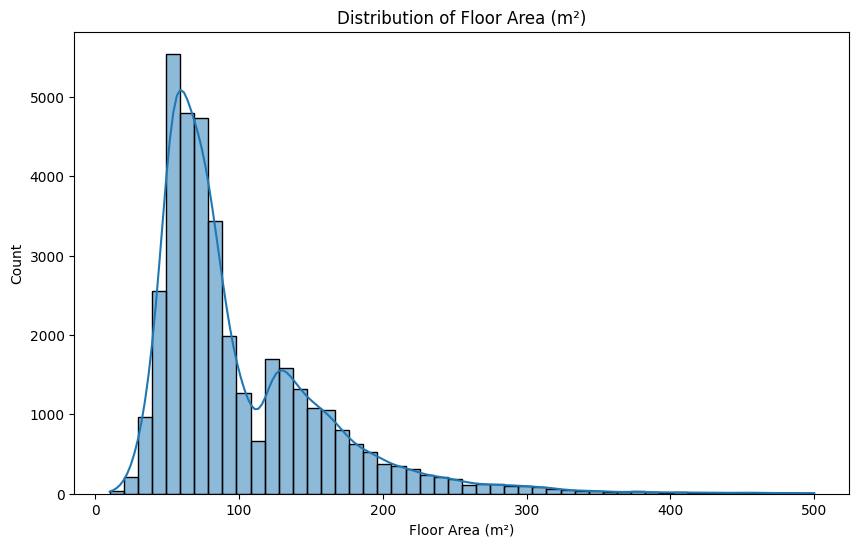

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='floorAreaSqM', bins=50, kde=True)
plt.title('Distribution of Floor Area (m²)')
plt.xlabel('Floor Area (m²)')
plt.ylabel('Count')
plt.show()

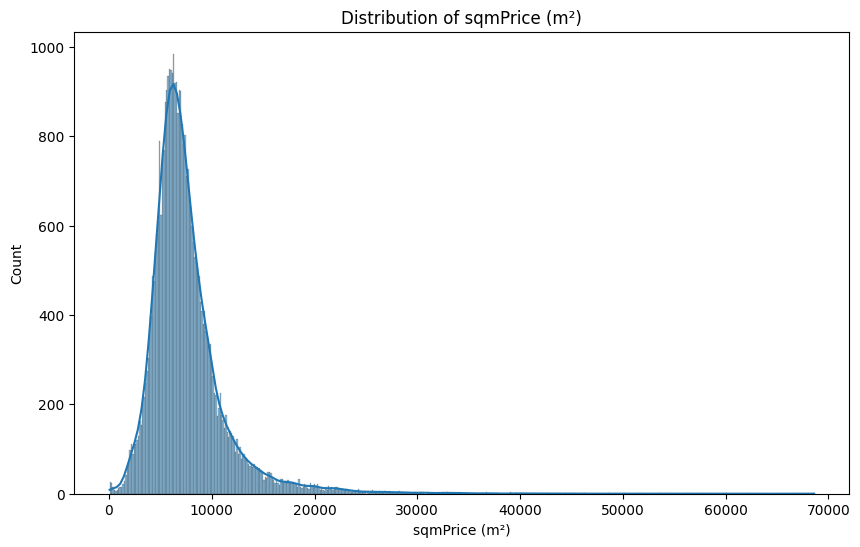

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sqmPrice', bins=500, kde=True)
plt.title('Distribution of sqmPrice (m²)')
plt.xlabel('sqmPrice (m²)')
plt.ylabel('Count')
plt.show()

In [22]:
df.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,soldYear,soldPrice,sqmPrice,soldDate,in_conservation_area,sqm_approx
count,37583.000000,37583.000000,37583.000000,37583.000000,37583.000000,37583.000000,37583.000000,3.758300e+04,37583.000000,37583,37583.000000,37583.000000
mean,51.509197,-0.117340,1.485299,2.382833,100.520661,1.237368,2023.328473,8.119169e+05,7616.738752,2023-10-14 10:37:01.706622464,0.289972,100.511668
min,51.386653,-0.347055,1.000000,1.000000,10.000000,0.000000,2023.000000,1.000000e+04,66.230000,2023-01-03 00:00:00,0.000000,10.000000
25%,51.465565,-0.184005,1.000000,1.000000,59.000000,1.000000,2023.000000,3.750000e+05,5460.325000,2023-06-12 00:00:00,0.000000,60.000000
50%,51.501828,-0.120158,1.000000,2.000000,78.000000,1.000000,2023.000000,5.300000e+05,6854.840000,2023-10-02 00:00:00,0.000000,80.000000
75%,51.549781,-0.054122,2.000000,3.000000,129.000000,1.000000,2024.000000,9.050000e+05,8750.000000,2024-02-23 00:00:00,1.000000,130.000000
max,51.665454,0.138188,8.000000,9.000000,500.000000,7.000000,2024.000000,2.250000e+07,68613.330000,2024-09-27 00:00:00,1.000000,500.000000
std,0.056477,0.089292,0.733059,1.290800,60.835119,0.611463,0.469664,9.214488e+05,3867.971948,NaN,0.453755,60.871258


In [23]:
df

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,soldYear,soldT,soldPrice,sqmPrice,soldDate,size_bucket,construction_age_band,in_conservation_area,area_code,sqm_approx
336472,"30 Britton Close, London, SE6 1AP",SE6 1AP,England,SE6,51.445308,-0.008436,1.0,1.0,50.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,208700,4174.00,2023-01-03,37-50m²,1983-1995,0,SE,50.0
336473,"3 Ashley Lane, London, NW4 1HD",NW4 1HD,England,NW4,51.593783,-0.219289,2.0,2.0,95.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,2350000,24736.84,2023-01-03,90m²-120m²,1950-1966,0,NW,95.0
336474,"Flat H, 151 Gray's Inn Road, London, WC1X 8UB",WC1X 8UB,England,WC1X,51.524786,-0.116678,1.0,1.0,34.0,0.0,Leasehold,Flat/Maisonette,D,2023,T1,385000,11323.53,2023-01-03,< 37m²,1983-1995,1,WC,35.0
336475,"Flat 22, 67 Elm Park Gardens, London, SW10 9QE",SW10 9QE,England,SW10,51.487411,-0.175778,1.0,1.0,62.0,1.0,Leasehold,Purpose Built Flat,C,2023,T1,488000,7870.97,2023-01-03,60-72m²,pre-1900,0,SW,60.0
336477,"Flat 17, 102 West Ham Lane, London, E15 4FP",E15 4FP,England,E15,51.536422,0.006397,1.0,1.0,54.0,1.0,Leasehold,Flat/Maisonette,B,2023,T1,440000,8148.15,2023-01-03,50-60m²,2012-onwards,0,E,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418194,"26 Risborough Close, Muswell Hill, London, N10...",N10 3PL,England,N10,51.590104,-0.140137,1.0,2.0,61.0,1.0,Leasehold,Flat/Maisonette,C,2024,T3,400000,6557.38,2024-09-25,60-72m²,1930-1949,0,N,60.0
418196,"9 Harvard Road, London, SE13 6SE",SE13 6SE,England,SE13,51.452919,-0.010221,2.0,3.0,123.0,2.0,Freehold,End Terrace House,D,2024,T3,650000,5284.55,2024-09-27,120m²-160m²,1900-1929,0,SE,125.0
418197,"Lower Ground Floor Flat 5, Northwood Hall, Hor...",N6 5PE,England,N6,51.571692,-0.137007,1.0,2.0,60.0,1.0,Leasehold,Purpose Built Flat,C,2024,T3,440000,7333.33,2024-09-27,50-60m²,1930-1949,1,N,60.0
418199,"15 Chester Row, London, SW1W 9JF",SW1W 9JF,England,SW1W,51.493587,-0.152122,3.0,4.0,218.0,2.0,Freehold,Terrace Property,C,2024,T3,6250000,28669.72,2024-09-27,> 200m²,pre-1900,1,SW,220.0


In [24]:
df.shape

(37583, 23)

In [25]:
# v_min = 0
# v_max = 1700000

# sns.set_style("white")

# plt.figure(figsize=(12, 10)) # Square-ish aspect ratio works better for maps

# sns.scatterplot(
#     data=df, 
#     x="longitude",      # Geographic X
#     y="latitude",       # Geographic Y
#     hue="soldPrice",    # Color based on price
#     palette="magma",
#     hue_norm=(v_min, v_max) # 'magma' or 'viridis' look great for geographic heatmaps
#     alpha=0.3,          # Low intensity as requested
#     edgecolor=None, 
#     s=15                # Smaller dots often reveal the city shape better
# )

# # Visual cleanup for a background-style map
# plt.title("London Real Estate Price Heatmap", fontsize=18, alpha=0.5, pad=20)
# plt.axis('off') # Hiding axes often looks better for 'shape' based plots

# # Optional: Add a very faint legend
# plt.legend(title="Sold Price (£)", bbox_to_anchor=(1, 0.2), loc='lower right', frameon=False)

# plt.tight_layout()
# plt.show()

# Using a dark background can sometimes make the colors 'pop' 
# while keeping the overall intensity low, but white is safer for presentations.
# sns.set_style("white")

# plt.figure(figsize=(12, 10))

# # 'Spectral_r' goes Blue -> Yellow -> Orange -> Red
# # 'RdYlBu_r' is another great alternative for this look
# sns.scatterplot(
#     data=df, 
#     x="longitude", 
#     y="latitude", 
#     hue="soldPrice", 
#     palette="Spectral_r",
#     hue_norm=(v_min, v_max)
#     alpha=0.4,            # Soft background intensity
#     edgecolor=None, 
#     s=20                  # Adjusted for visibility
# )

# # Crucial for geographic accuracy: ensures London isn't stretched
# plt.gca().set_aspect('equal', adjustable='box')

# # Minimalist styling for presentation background
# plt.axis('off') 
# plt.title("London Property Value Heatmap", fontsize=18, color='gray', alpha=0.6)

# # Customizing the legend to be subtle
# plt.legend(title="Price", bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False)

# plt.tight_layout()
# plt.show()

# # Define your price boundaries
# v_min = 0
# v_max = 1700000

# plt.figure(figsize=(12, 10))

# sns.scatterplot(
#     data=df, 
#     x="longitude", 
#     y="latitude", 
#     hue="soldPrice", 
#     palette="Spectral_r", 
#     hue_norm=(v_min, v_max), # Forces the color scale into your range
#     alpha=0.2,
#     edgecolor=None, 
#     s=25
# )

# # Geographic correction
# plt.gca().set_aspect('equal', adjustable='box')

# # Cleanup
# plt.axis('off')
# plt.title("London Property Prices (Capped at £1.7M for contrast)", alpha=0.6)

# plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2443160122.py, line 14)

In [ ]:
# # 1. Setup boundaries
# v_min = 0
# v_max = 1500000

# # 2. Style for background (clean and soft)
# sns.set_style("white")
# plt.figure(figsize=(14, 14)) 

# # 3. The Plot
# # Note: Spectral_r provides Blue (low) -> Yellow (mid) -> Red (high)
# ax = sns.scatterplot(
#     data=df, 
#     x="longitude", 
#     y="latitude", 
#     hue="soldPrice", 
#     palette="Spectral_r", 
#     hue_norm=(v_min, v_max), # Fixed comma here
#     alpha=0.25,              # Lower alpha makes overlapping areas "glow"
#     edgecolor=None, 
#     s=20                     # Small dots to define the city silhouette
# )

# # 4. Critical Map Formatting
# plt.gca().set_aspect('equal', adjustable='box') # Keeps London from stretching
# plt.axis('off')                                 # Removes all boxes/lines

# # 5. Soft Title
# plt.title("London Property Value Distribution", 
#           fontsize=20, 
#           color='lightgray', 
#           pad=-20) # Negative pad moves title inside slightly for background look

# # 6. Subtle Legend
# plt.legend(title="Sold Price (£)", 
#            labels=['Low', '', '', '', '£1.7M+'],
#            bbox_to_anchor=(0.95, 0.2), 
#            frameon=False,
#            labelcolor='gray')

# plt.tight_layout()
# plt.show()

In [ ]:
# sns.pairplot(df, hue="soldPrice")
# plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37583 entries, 336472 to 418200
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fullAddress            37583 non-null  object        
 1   postcode               37583 non-null  object        
 2   country                37583 non-null  object        
 3   outcode                37583 non-null  object        
 4   latitude               37583 non-null  float64       
 5   longitude              37583 non-null  float64       
 6   bathrooms              37583 non-null  float64       
 7   bedrooms               37583 non-null  float64       
 8   floorAreaSqM           37583 non-null  float64       
 9   livingRooms            37583 non-null  float64       
 10  tenure                 37583 non-null  object        
 11  propertyType           37583 non-null  object        
 12  currentEnergyRating    37583 non-null  object        
 13  

In [27]:
df = df.drop(columns=['soldDate'])

In [ ]:
# df.to_csv('../1_data/df_cleaned.csv', index=False)

In [28]:
df['in_conservation_area'].value_counts()

in_conservation_area
0    26685
1    10898
Name: count, dtype: int64

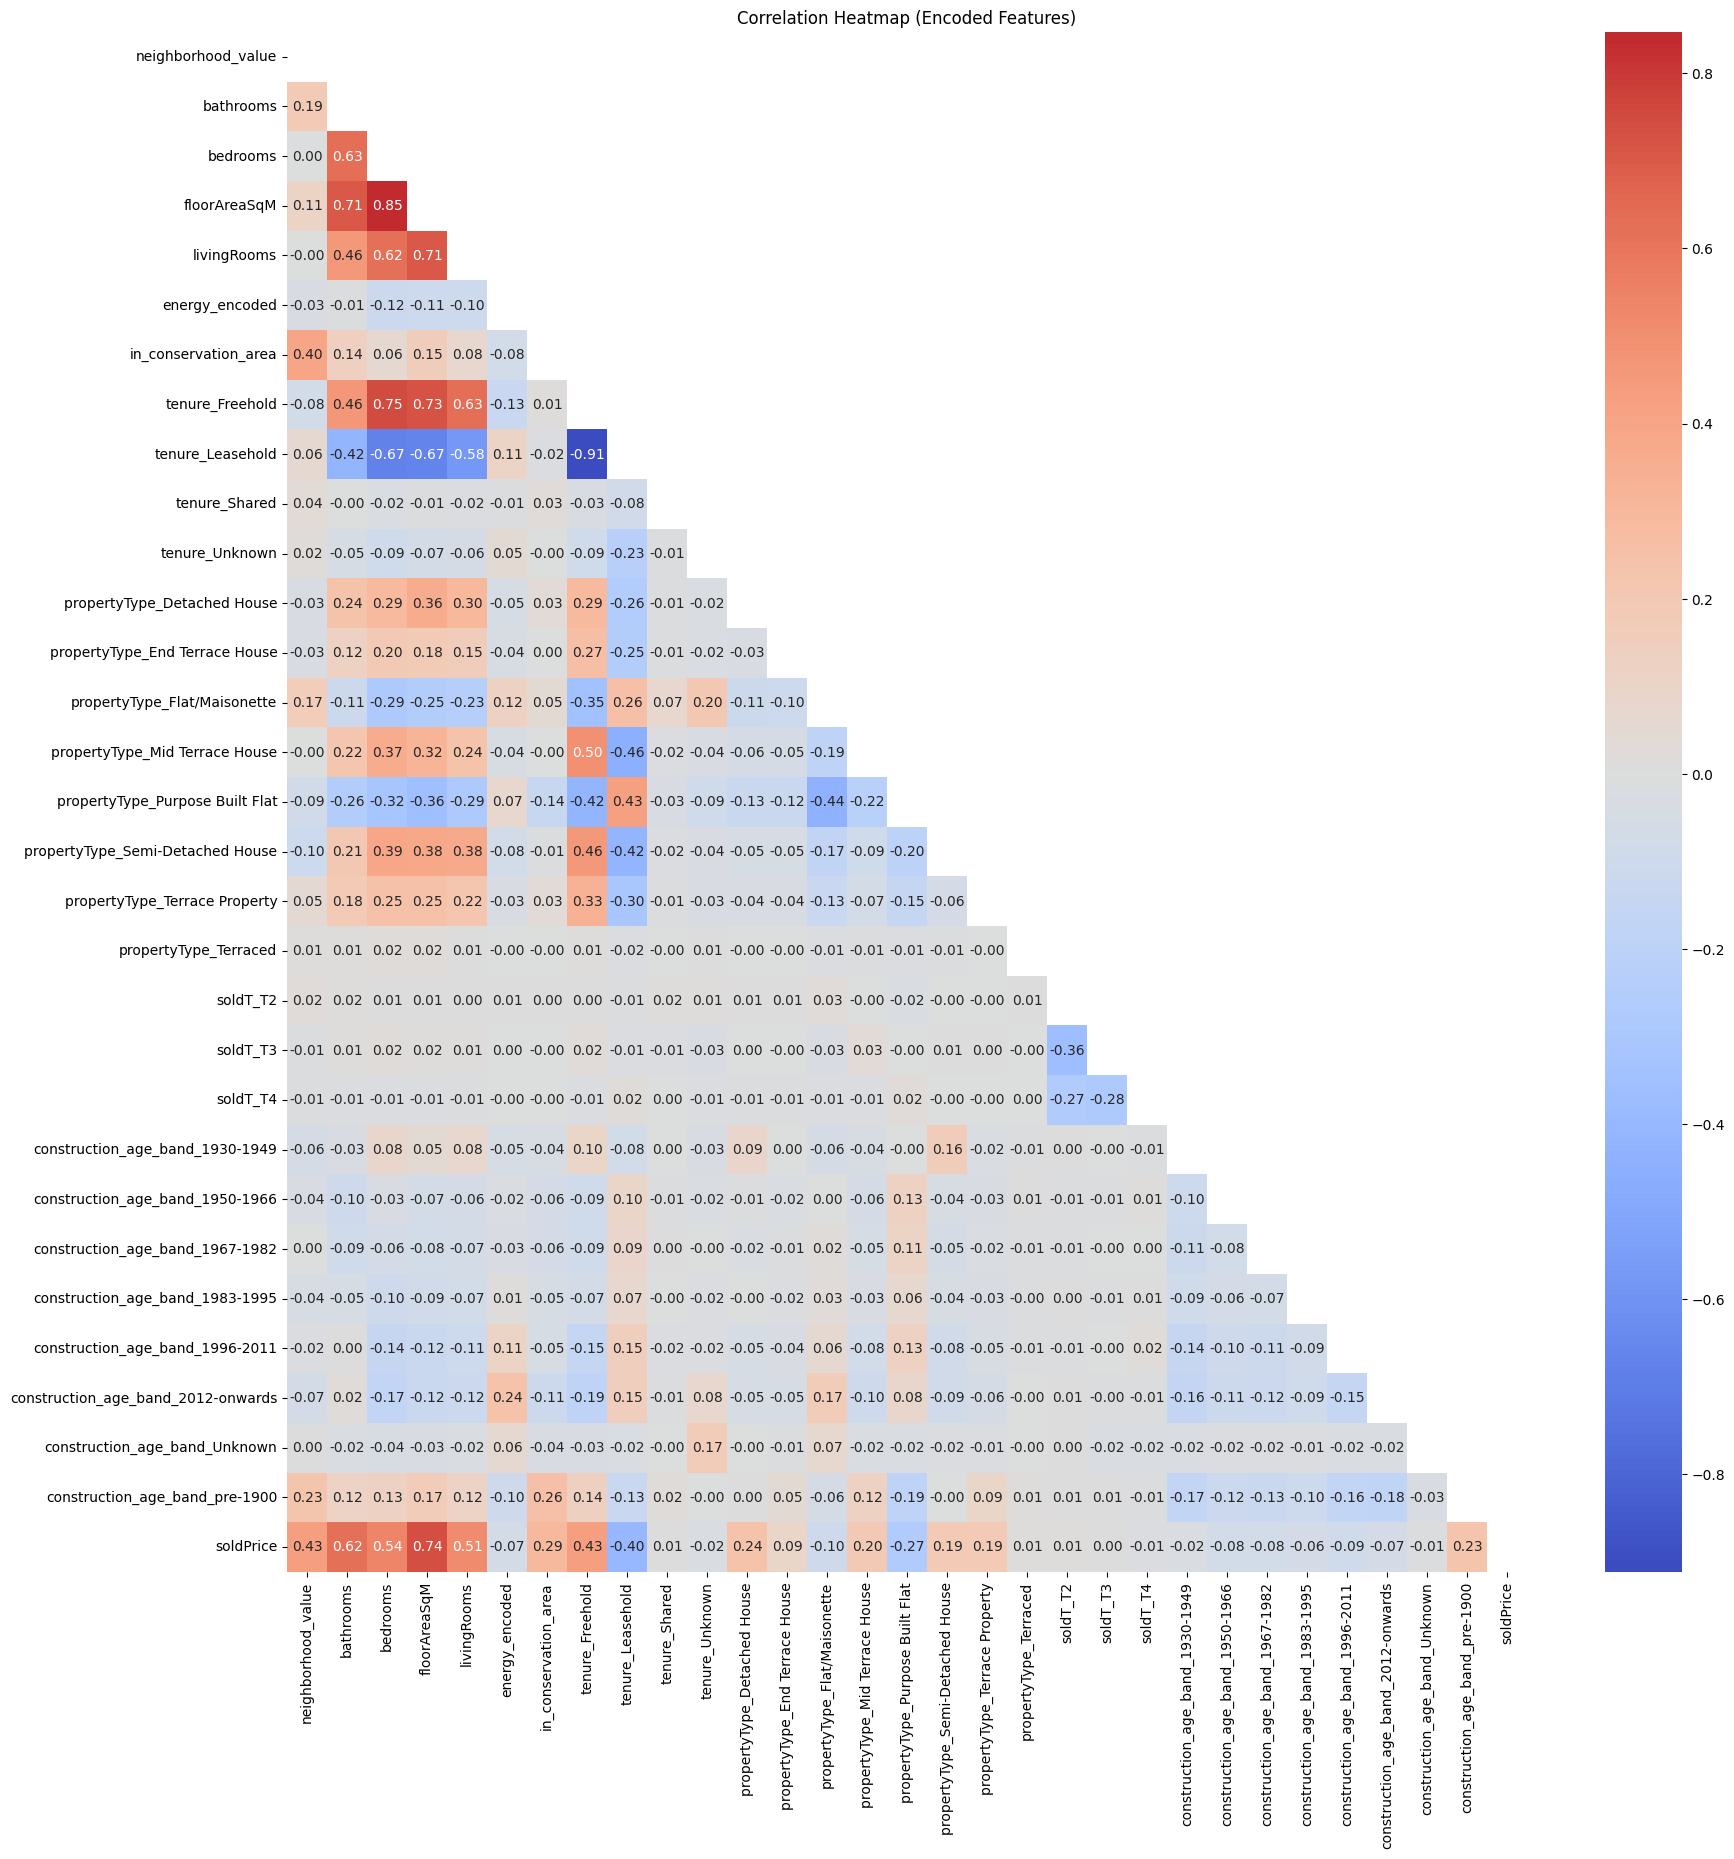

                               feature         VIF
30                               const  118.845745
7                      tenure_Freehold   28.707280
8                     tenure_Leasehold   18.145066
14      propertyType_Mid Terrace House    6.801223
16    propertyType_Semi-Detached House    6.341279
3                         floorAreaSqM    6.179767
2                             bedrooms    4.462456
17       propertyType_Terrace Property    3.991841
11         propertyType_Detached House    3.522349
12      propertyType_End Terrace House    2.968895
10                      tenure_Unknown    2.947832
15     propertyType_Purpose Built Flat    2.879151
13        propertyType_Flat/Maisonette    2.709396
1                            bathrooms    2.289817
4                          livingRooms    2.208572
27  construction_age_band_2012-onwards    1.708931
26     construction_age_band_1996-2011    1.533982
29      construction_age_band_pre-1900    1.462513
20                            s

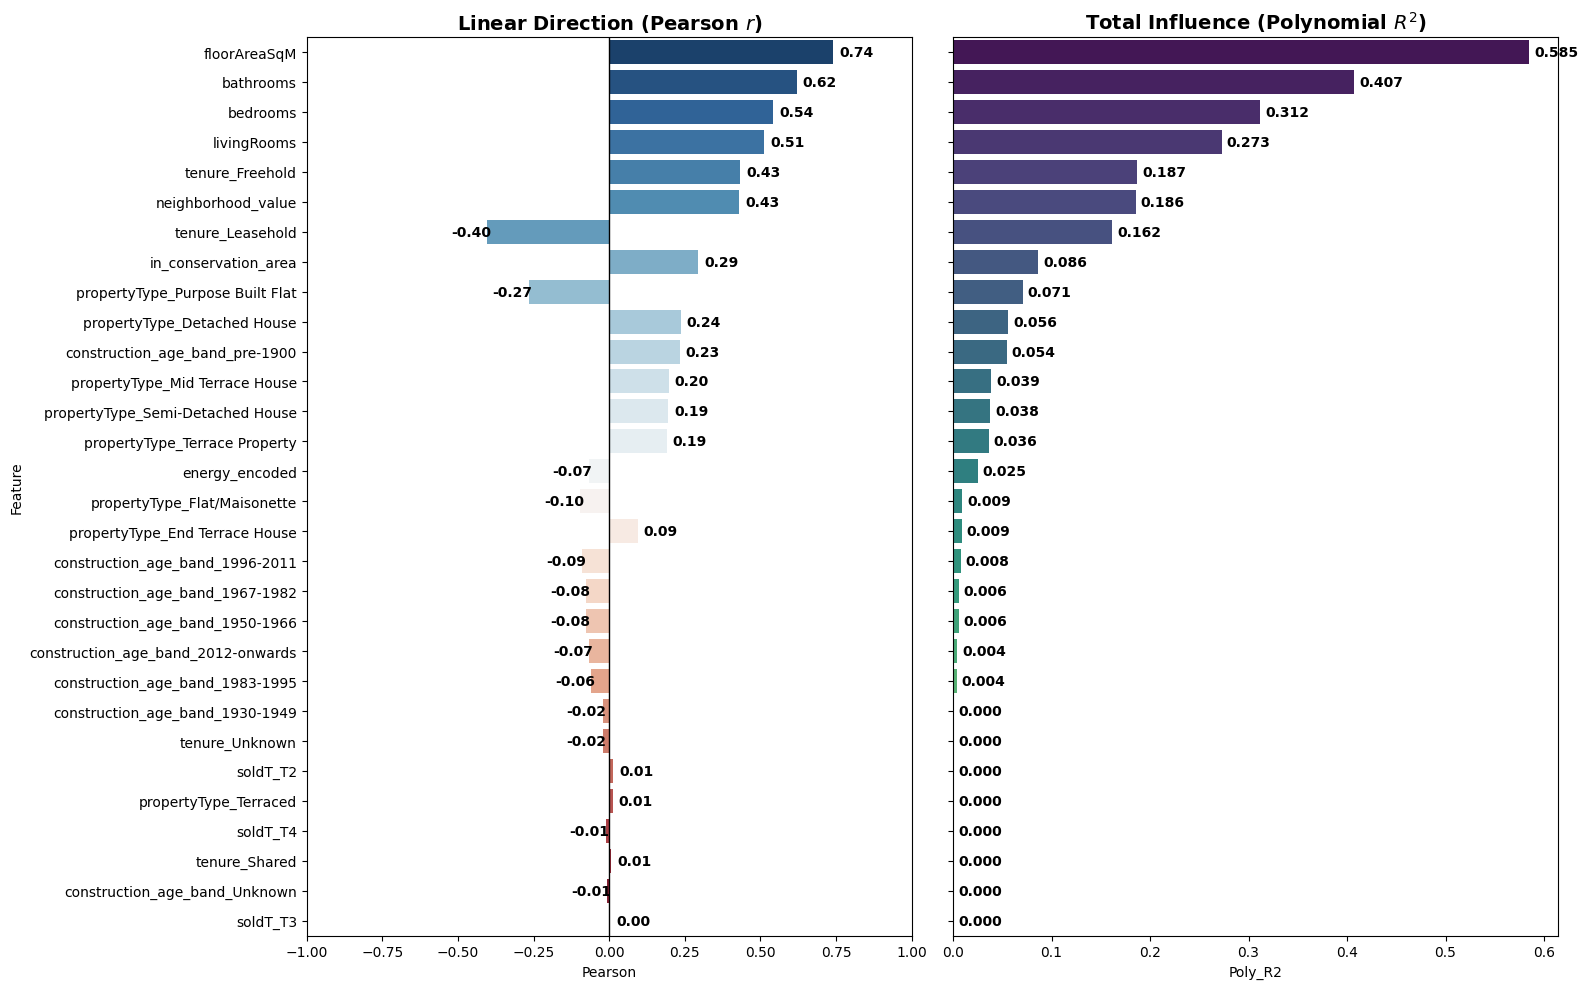

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Create df_analysis
df_analysis = df.copy()

# A. Convert Rooms to Integers
room_cols = ['bathrooms', 'bedrooms', 'livingRooms']
df_analysis[room_cols] = df_analysis[room_cols].astype(int)

# B. Label Encode Energy Rating (Ordinal: A=7, G=1, NotRated=0)
energy_map = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1, 'NotRated': 0}
df_analysis['energy_encoded'] = df_analysis['currentEnergyRating'].map(energy_map)

# C. Target Encode Outcode (using median sqmPrice)
outcode_medians = df.groupby('outcode')['sqmPrice'].median()
df_analysis['neighborhood_value'] = df_analysis['outcode'].map(outcode_medians)

# D. One-Hot Encoding for categorical columns
# We drop the first category to avoid the "Dummy Variable Trap" (Multicollinearity)
df_analysis = pd.get_dummies(df_analysis, columns=['tenure', 'propertyType', 'soldT', 'construction_age_band'], drop_first=True)

# E. Select final features (excluding the original strings and size_bucket)
final_features = [
    'neighborhood_value', 'bathrooms', 'bedrooms', 'floorAreaSqM', 
    'livingRooms', 'energy_encoded', 'in_conservation_area'
] + [col for col in df_analysis.columns if 'tenure_' in col or 'propertyType_' in col or 'soldT_' in col or 'construction_age_band' in col]

X_analysis = df_analysis[final_features].astype(float)
y_target = df_analysis['soldPrice']

# 1. Heatmap
plt.figure(figsize=(20, 20))
corr_matrix = pd.concat([X_analysis, y_target], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

# 2. VIF Analysis
vif_data = pd.DataFrame()
X_vif = X_analysis.assign(const=1)
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(vif_data.sort_values(by="VIF", ascending=False))

comparison_list = []

for col in final_features:
    # Pearson r
    r_val, _ = pearsonr(X_analysis[col], y_target)
    
    # Polynomial R2 (Degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_analysis[[col]])
    poly_model = LinearRegression().fit(X_poly, y_target)
    r2_val = r2_score(y_target, poly_model.predict(X_poly))
    
    comparison_list.append({'Feature': col, 'Pearson': r_val, 'Poly_R2': r2_val})

comparison_df = pd.DataFrame(comparison_list).set_index('Feature').sort_values('Poly_R2', ascending=False)

# 4. Bar Plot Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# --- LEFT PLOT: Pearson (Direction) ---
sns.barplot(
    ax=axes[0], 
    x=comparison_df['Pearson'], 
    y=comparison_df.index, 
    hue=comparison_df.index, 
    palette='RdBu_r',  # Capitalized correctly now
    legend=False
)
axes[0].set_title('Linear Direction (Pearson $r$)', fontsize=14, fontweight='bold')
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlim(-1, 1)

# --- RIGHT PLOT: Polynomial R2 (Total Influence) ---
sns.barplot(
    ax=axes[1], 
    x=comparison_df['Poly_R2'], 
    y=comparison_df.index, 
    hue=comparison_df.index, 
    palette='viridis', # Lowercase is correct for this one
    legend=False
)
axes[1].set_title('Total Influence (Polynomial $R^2$)', fontsize=14, fontweight='bold')

# Add values to bars correctly
for i, (p, r2) in enumerate(zip(comparison_df['Pearson'], comparison_df['Poly_R2'])):
    # Pearson labels
    offset_p = 0.02 if p >= 0 else -0.12
    axes[0].text(p + offset_p, i, f"{p:.2f}", color='black', va='center', fontweight='bold')
    
    # R2 labels
    axes[1].text(r2 + 0.005, i, f"{r2:.3f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# %pip install statsmodels

In [ ]:
df.columns

In [ ]:
# df_analysis.to_csv('../1_data/df_analysis.csv', index=False)

In [ ]:
df_analysis

In [ ]:
df_analysis.info()